# **`Generating Water Currents with Perlin Noise`**

<a href="../PearlNoiseProject.ipynb">Back To Main</a>

### Table of Contents
<a id="table_of_content"></a>
1. <a href="#introduction">Introduction</a>
2. <a href="#perlinnoise">Generating Perlin noise</a>
    - <a href="#perlin_noise_function">Perlin Noise Function</a>
    - <a href="#animation_creation">Stream Plo and Animation Creation</a>
    - <a href="#animation_saving">Animation Saving</a>
    - <a href="#texture_warping">Texture Warping</a>
    - <a href="#animated_texture_distortion">Аnimated texture distortion</a>
    - <a href="#gif_display">GIF Display</a>
3. <a href="#conclusion">Conclusion</a>

### Dependencies

Let's import the required libraries for this project.

In [9]:
import numpy as np
from noise import snoise2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import cv2
from noise import snoise2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import os
import glob
from IPython.display import display, HTML

## Introduction
<a id="introduction"></a>

This Demo shows the use of Perlin Noise for visualizing natural phenomena like water currents. The Python libraries `numpy`, `noise`, `matplotlib` and `opencv` are used here to create 2D representations and animations of the generated Perlin Noise.


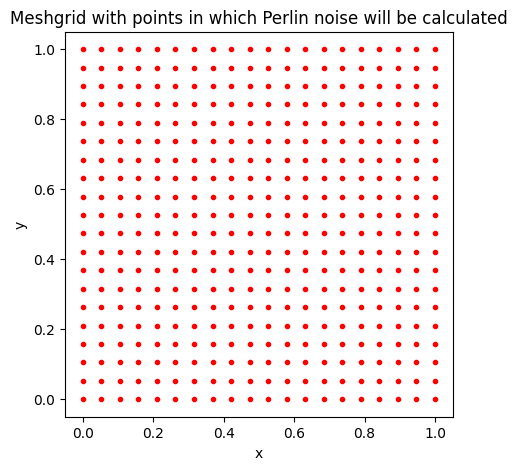

In [10]:
seed = np.random.randint(0, 100)

x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)
x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=(5, 5))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Meshgrid with points in which Perlin noise will be calculated')
plt.plot(x, y, marker='.', color='r', linestyle='none')

plt.show()

## Generating Perlin Noise
<a id="perlinnoise"></a>

### Perlin Noise Function
<a id="perlin_noise_function"></a>

A function `generate_perlin_noise_2d` is defined to generate 2D Perlin Noise. This function generates a smoothly transitioning, pseudorandom pattern for each point in a given 2D grid. This can be repurposed to generate Perlin Noise for other applications such as creating textures or other visual effects.

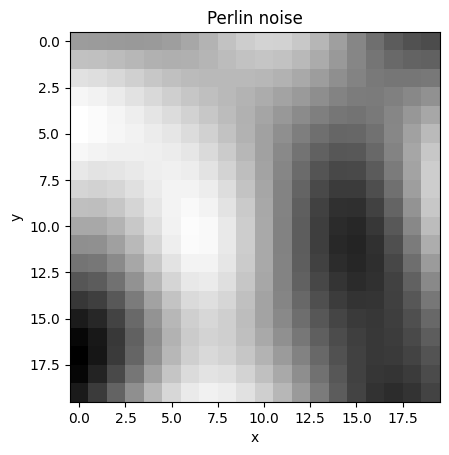

In [11]:
def generate_perlin_noise_2d(x, y, seed=0):
    temp = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            temp[i][j] = snoise2(x[i][j] + seed, y[i][j] + seed)
    return temp

plt.imshow(generate_perlin_noise_2d(x, y, seed=seed), cmap='gray')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Perlin noise')

plt.show()

The Perlin noise function `snoise2` is being used here. For each point in the 2D grid, the function takes the seed value and the x and y coordinates of the point to compute a Perlin noise value. The generated noise values form a matrix that defines the pattern of the simulated water current.

In the Perlin noise generation function, each point in the grid receives a value defined as:

$$ temp[i][j] = snoise2(x[i][j] + seed, y[i][j] + seed) $$

This line generates Perlin noise for each point in the 2D grid defined by `x` and `y` using a seed value for variability, and stores the results in a 2D array `temp`.

`x[i][j] + seed` and `y[i][j] + seed`: This modifies the x and y coordinates by adding a seed value. The seed value is important in Perlin noise generation because it ensures that we get a different but deterministic noise pattern each time you generate the noise. It's like the starting point for the pseudo-random number generator used in the noise function.

`snoise2(x[i][j] + seed, y[i][j] + seed)`: The `snoise2` function is a 2D simplex noise function and returns a float value between -1 and 1 that represents the generated noise value at the given point `(x[i][j] + seed, y[i][j] + seed)`. Simplex noise is a method for constructing an n-dimensional noise function comparable to Perlin noise but with fewer computational overhead and visually isotropic results.

`temp[i][j] = ...`: This saves the generated noise value at the corresponding point in the `temp` array. The `temp` array has the same shape as the x and y coordinate grids and holds the generated Perlin noise.

---

### Stream Plot and Animation Creation
<a id="animation_creation"></a>

This part of the code generates 2D Perlin Noise arrays `U` and `V` and creates a quiver plot `Q` using them. This quiver plot, also known as a stream plot, visualizes the direction and magnitude of water currents as determined by Perlin Noise.

Matplotlib's `FuncAnimation` function is used to create an animation of the quiver plot. This animation shows how the water currents evolve over time as the Perlin Noise changes.

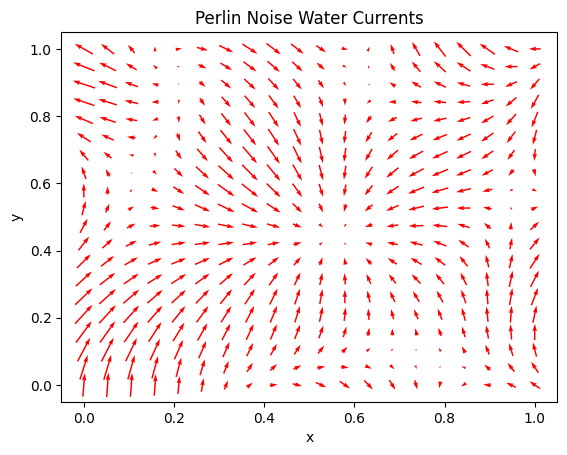

In [12]:
def update_quiver(num, Q, x, y, seed):
    U = generate_perlin_noise_2d(x, y, seed + num * 0.05)
    V = generate_perlin_noise_2d(x, y, seed + 100 + num * 0.05)
    Q.set_UVC(U,V)
    return Q,

U = generate_perlin_noise_2d(x, y, seed)
V = generate_perlin_noise_2d(x, y, seed + 100)
Q = plt.quiver(x, y, U, V, pivot='mid', color='r', units='inches')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Perlin Noise Water Currents')

ani = animation.FuncAnimation(plt.gcf(), update_quiver, frames=range(0, 100), fargs=(Q, x, y, seed), interval=100, blit=True)

### Here is an explanation of animation creation:

1. **Creating the Stream Plot**

    We start with creating a stream plot (also known as a quiver plot) that represents a "snapshot" of the water currents at a particular moment in time. 

    We first generate the Perlin noise for our 2D grid of points using the `generate_perlin_noise_2d` function. We do this twice to get two 2D arrays `U` and `V` that represent the horizontal and vertical components, respectively, of the vector field that we will visualize.

    The `plt.quiver` function is then used to create a 2D field of arrows from `U` and `V`, which are visualizations of the vectors at each point in the grid. Each arrow's direction and length represent the direction and magnitude of the vector at that point.

    The `pivot='mid'` argument ensures that the arrows are centered at their corresponding grid points. The `color='r'` argument makes the arrows red, and the `units='inches'` argument specifies that the arrow dimensions are in inches on the plot.

2. **Updating the Stream Plot**

    The `update_quiver` function is defined to update the stream plot for each frame of the animation. It does this by generating a new Perlin noise pattern for each frame, resulting in new `U` and `V` matrices that simulate the evolution of the water currents over time.

    The `num` argument is the frame number, and by adding `num * 0.05` to the seed when generating the Perlin noise, we ensure that a different noise pattern is produced for each frame.

    The `Q.set_UVC(U,V)` line updates the components of the arrows in the quiver plot with the newly generated values of `U` and `V`.

3. **Creating the Animation**

    The `animation.FuncAnimation` function is used to create the animation. It takes several arguments:

    - `plt.gcf()` returns the current figure which the animation is built upon.
    - `update_quiver` is the function to call at each frame to update the figure.
    - `frames=range(0, 100)` specifies that we want 100 frames in our animation.
    - `fargs=(Q, x, y, seed)` are additional arguments to pass to `update_quiver` each time it is called.
    - `interval=100` sets the delay between frames to be 100 milliseconds.
    - `blit=True` is an optimization that, if True, only redraws the parts of the figure that have changed.

    The result is an animation of the quiver plot that shows how the water currents evolve over time as the Perlin noise changes, giving the illusion of fluid dynamics.

### Animation Saving
<a id="animation_saving"></a>

The animation is then saved as a GIF file for visualization, presentation, or further analysis.

In [13]:
ani.save('../Images/Animation/water_current_animation.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


---

## Texture Warping
<a id="texture_warping"></a>

Perlin Noise can also be used to create natural-looking warps in texture images. This is demonstrated by loading a texture image, generating a displacement based on Perlin Noise, and applying this displacement to the texture to create a warped effect.

In [14]:
seed = np.random.randint(0, 100)

texture = cv2.cvtColor(cv2.imread('../Images/water_texture.jpg'), cv2.COLOR_BGR2RGB)

x = np.linspace(0, 1, texture.shape[1])
y = np.linspace(0, 1, texture.shape[0])
x, y = np.meshgrid(x, y)

def warp_texture(texture, displacement_x, displacement_y):
    map_y, map_x = np.indices((texture.shape[0], texture.shape[1]))
    map_x = map_x.astype(np.float32)
    map_y = map_y.astype(np.float32)
    displacement_x = cv2.normalize(displacement_x, None, alpha=0, beta=texture.shape[1], norm_type=cv2.NORM_MINMAX) 
    displacement_y = cv2.normalize(displacement_y, None, alpha=0, beta=texture.shape[0], norm_type=cv2.NORM_MINMAX) 
    map_x = map_x + displacement_x.astype(np.float32)
    map_y = map_y + displacement_y.astype(np.float32)
    warped_texture = cv2.remap(texture, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
    return warped_texture

### Animated Texture Distortion
<a id="animated_texture_distortion"></a>

This section of the Demo demonstrates how to apply a Perlin noise-based distortion to a static texture to create a dynamic, animated effect that mimics the flowing of water. The Perlin noise is used to generate a displacement map, which is then applied to the texture image. This process is repeated for each frame of the animation, with slightly different Perlin noise each time to create the appearance of movement.

MovieWriter ../Images/Animation/imagemagick unavailable; using Pillow instead.


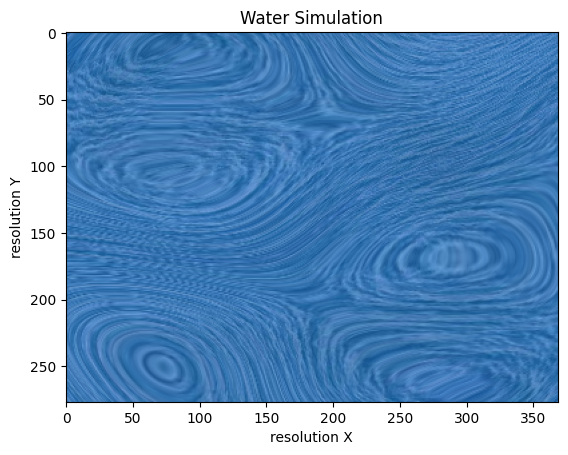

In [15]:
fig = plt.figure()

ims = []
for frame_num in range(100):
    displacement_x = generate_perlin_noise_2d(x, y, seed + frame_num * 0.005)
    displacement_y = generate_perlin_noise_2d(x, y, seed + 100 + frame_num * 0.005)
    warped_texture = warp_texture(texture, displacement_x, displacement_y)
    cv2.imwrite(f'frame_{frame_num:03d}.png', cv2.cvtColor(warped_texture, cv2.COLOR_RGB2BGR))
    ims.append([plt.imshow(warped_texture, animated=True)])

plt.xlabel('resolution X')
plt.ylabel('resolution Y')
plt.title('Water Simulation')

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani.save('../Images/Animation/dynamic_water.gif', writer='../Images/Animation/imagemagick', fps=30)

for filename in glob.glob("frame_*.png"):
    os.remove(filename)

### GIF Display
<a id="gif_display"></a>

The created GIFs are displayed side by side for comparison using the `display_gifs` function `(be patient with this display)`.

In [16]:
def display_gifs(gif1, gif2):
    return display(HTML(f'<table><tr><td><img src="{gif1}"></td><td><img src="{gif2}"></td></tr></table>'))

display_gifs('../Images/Animation/water_current_animation.gif', '../Images/Animation/dynamic_water.gif')


,



---

## Conclusion


In this Demo we have illustrated the use of Perlin Noise to generate intricate and natural-looking simulations of water currents. These techniques have far-reaching implications that span beyond creating aesthetically pleasing patterns. They find meaningful application in several practical areas, incorporating the following:

1. **Weather Forecasting and Climate Studies:** The methods shown here can be used to simulate atmospheric conditions and ocean currents, which are key to predictive models used in weather forecasting. By manipulating the Perlin noise's seed and parameters, we could potentially simulate and anticipate future weather patterns, assisting meteorologists in making accurate predictions.

2. **Environmental Modelling:** The simulations based on Perlin Noise can be the foundation for more extensive environmental models. For instance, the simulation of water flow in ecosystems can aid researchers in understanding and anticipating the impacts of environmental changes on local wildlife.

3. **Disaster Management:** On a grander scale, these simulations can be instrumental in disaster management. Visualizing water currents can help predict flood paths, allowing for more efficient evacuation planning and risk mitigation.

The simulations we've constructed mirror the continuous, directional movements seen in actual ocean currents. Influenced by various forces, these currents in our model flow across significant distances, mimicking real-world phenomena like the global conveyor belt's effects on the climate of various regions. These currents affect the "temperature" of the regions they traverse, similar to how warm currents increase the temperature of the areas they travel in reality.

Our model also accounts for different types of currents - surface and deep-water currents - that help define the characteristics of ocean waters. The dynamics of our model define and describe the motion of virtual water, with the ability to separate into distinct layers: mixed (surface) layer, upper ocean (above the thermocline), and deep ocean.

Perlin Noise, with its inherent quality of producing natural-looking randomness, proves to be a crucial asset in these simulations. Its capability to generate smooth, random yet consistent patterns makes it an invaluable tool for simulating natural phenomena, which are often complex, dynamic, and display non-repeating patterns.

In conclusion, with creativity and further development, the principles and methods introduced in this notebook can be integrated into a wide array of applications. They offer potential advancements in areas ranging from weather prediction and climate modelling to environmental conservation and disaster management. The power of Perlin Noise, as demonstrated in this notebook, truly underscores its potential in creating naturalistic, compelling simulations.

<a href="#table_of_content">Table of content</a>


<a href="../PearlNoiseProject.ipynb">Back To Main</a>

<a id="conclusion"></a>
